In [18]:
import pandas

In [19]:
url = "https://data.urbansharing.com/oslobysykkel.no/trips/v1/2022/0{n}.csv"

In [20]:
data = pandas.concat([
pandas.read_csv(url.format(n=n), parse_dates=[0,1])
    for n in [4, 5, 6]
])

<AxesSubplot:ylabel='Frequency'>

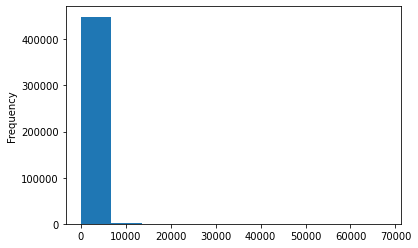

In [21]:
data['duration'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

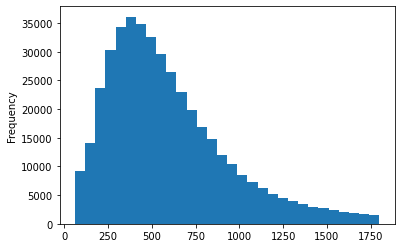

In [22]:
data[data['duration'] < 60*30]['duration'].plot.hist(bins=30)

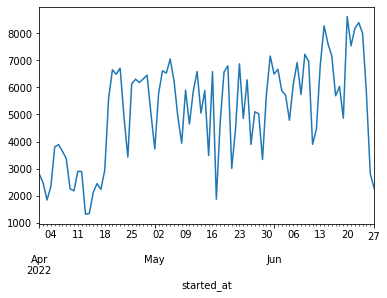

In [41]:
data.groupby(pandas.Grouper(key='started_at', freq='D')).size().plot()
None

<AxesSubplot:xlabel='started_at'>

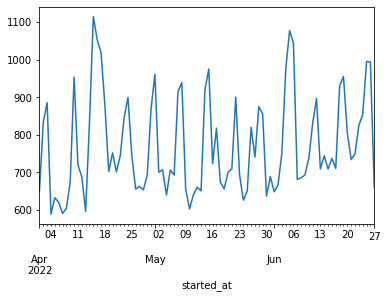

In [43]:
data.groupby(pandas.Grouper(key='started_at', freq='D')).mean()['duration'].plot()

In [48]:
data.groupby(pandas.Grouper(key='started_at', freq='H')).size()['2022-04']

started_at
2022-04-01 03:00:00+00:00      9
2022-04-01 04:00:00+00:00     53
2022-04-01 05:00:00+00:00    212
2022-04-01 06:00:00+00:00    336
2022-04-01 07:00:00+00:00    166
                            ... 
2022-04-30 19:00:00+00:00    183
2022-04-30 20:00:00+00:00    136
2022-04-30 21:00:00+00:00    135
2022-04-30 22:00:00+00:00     95
2022-04-30 23:00:00+00:00      1
Freq: H, Length: 717, dtype: int64

In [51]:
by_hour = data.groupby(pandas.Grouper(key='started_at', freq='h')).size()

In [56]:
by_hour.index.hour

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='started_at', length=2098)

In [60]:
df_hourly = pandas.DataFrame({'date': by_hour.index.date,
                              'hour': by_hour.index.hour,
                              'count': by_hour})

In [62]:
df_hourly = df_hourly.pivot(index='date', columns='hour', values='count').fillna(0)

<AxesSubplot:xlabel='hour'>

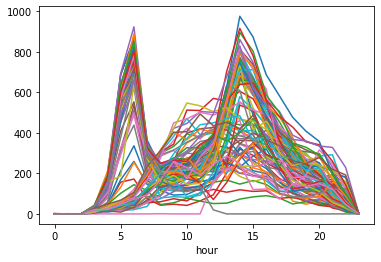

In [65]:
df_hourly.T.plot(legend=False)

In [66]:
from sklearn.cluster import KMeans

In [74]:
ks = list(range(1, 7))
scores = [KMeans(n_clusters=k).fit(df_hourly).inertia_ for k in ks]

In [75]:
import matplotlib.pyplot as plt

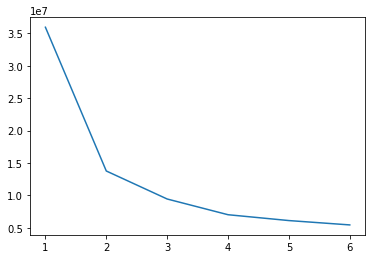

In [76]:
plt.plot(ks, scores)

In [77]:
model = KMeans(n_clusters=2).fit(df_hourly)

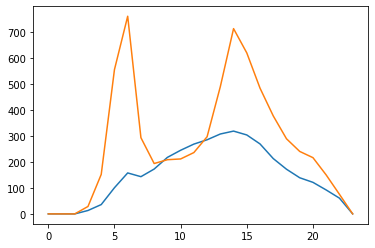

In [81]:
plt.plot(model.cluster_centers_.T)
None

In [82]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
      dtype=int32)

<AxesSubplot:xlabel='hour'>

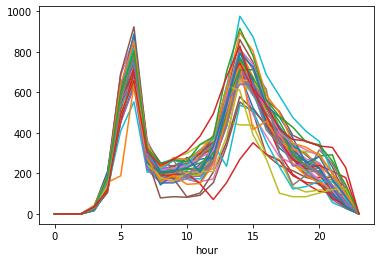

In [94]:
df_hourly.loc[model.labels_.astype(bool)].T.plot(legend=False)

<AxesSubplot:xlabel='hour'>

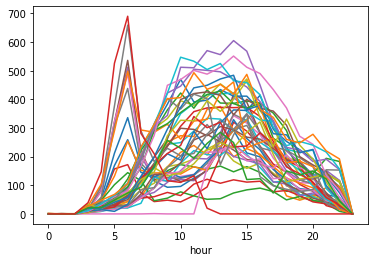

In [95]:
df_hourly.loc[~model.labels_.astype(bool)].T.plot(legend=False)

In [108]:
model.transform(df_hourly.loc[model.labels_.astype(bool)])[:,1]

array([258.77017628, 157.61231074, 116.95708049, 169.93582892,
       197.97142711, 148.13830928, 152.51558652,  98.08741253,
       189.60102739, 215.94907764, 135.29934672, 148.98308185,
       177.38557015, 223.18715046, 203.88578475, 490.81412381,
       315.03485312, 107.83533131, 484.58783287, 315.62283957,
       127.56479475, 176.82876809, 147.94180227, 742.70702932,
       211.87432927, 320.78271398, 214.80298488, 168.97311391,
       223.7451971 , 460.57928401, 172.16325378, 464.78915508,
       216.12497341, 250.75224017, 183.41199164, 425.13212336,
       277.51397106, 324.08304848, 577.18738453, 586.51257798,
       275.52289881, 407.79401501, 473.52455494, 483.91242121])

In [111]:
dists = model.transform(df_hourly.loc[~model.labels_.astype(bool)])[:,0]

In [114]:
((dists - dists.mean()) / dists.std())

array([-0.13662365, -0.70386124,  0.08712042,  0.09603557,  0.50766887,
        0.64284877,  0.28627911,  0.09581942, -0.46869824, -0.40938075,
       -0.75695989, -0.85301965,  1.29619929,  0.87463101, -0.31427918,
       -0.70337403, -0.48560771, -1.19815717, -0.07733311, -1.51870894,
        0.10684195, -1.16685522, -0.22875233, -1.11689133,  1.70545875,
       -1.53246354,  0.80343948,  1.05142043, -1.0122746 , -0.4951586 ,
       -0.78538173,  0.43816731, -0.09477271, -1.40419954,  0.92944375,
       -0.13399396,  1.72839517,  0.06368026, -0.48165033,  1.44865766,
        0.07521075,  0.85173616, -0.60929608,  3.59863938])